### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataFrame = pd.read_csv("heart.csv")
dataFrame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### One Hot Encoding for Categorical Features

In [4]:
dummie_sex = pd.get_dummies(dataFrame.Sex)
dummie_EA = pd.get_dummies(dataFrame.ExerciseAngina)
dummie_CP = pd.get_dummies(dataFrame.ChestPainType)
dummie_RECG = pd.get_dummies(dataFrame.RestingECG)
dummie_STS = pd.get_dummies(dataFrame.ST_Slope)

In [5]:
#Merging dummy variables
merged_dataFrame = pd.concat([dataFrame,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)
merged_dataFrame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [6]:
#dropping the categorical columns
final_dataFrame = merged_dataFrame.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_dataFrame.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [7]:
final_dataFrame.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.595861,0.404139,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.490992,0.490992,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_knn = final_dataFrame.copy()

In [9]:
Y = df_knn.HeartDisease.values # Y is now a numpy array
X = df_knn.drop(['HeartDisease'],axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


### Train-Test Split

In [10]:
#now the data is split into 80%-20% where the 20% test data is completely untouched
#the rest 80% data (train-validation) are then divided into 4 folds for cross validation

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

### Scaling the Data

In [11]:
# Scaling Training and testing data seperately to avoid leakage
# Standardscaler scales the data using F(X) = (X − mean)/std 

scaler = StandardScaler()   #initiate an instant of StandardScaler
scaler.fit(X_train_val)
scaled_X_train_val = scaler.transform(X_train_val)
scaled_X_test = scaler.transform(X_test)

In [12]:
type(scaled_X_train_val)

numpy.ndarray

### Building KNN Model-Class

In [13]:
class k_nearest_neighbors:

    # Initialization
    def __init__(self, n_neighbors=5):  # default neighbors to be returned
        self.n_neighbors = n_neighbors

    # Euclidian Distance
    def euclidean_distance(self, a, b):
        eucl_distance = 0.0  # initializing eucl_distance at 0
        for index in range(len(a)):
            eucl_distance += (a[index] - b[index]) ** 2
            euclidian_distance = np.sqrt(eucl_distance)
        return euclidian_distance

    # Fit k Nearest Neighbors
    def fit_knn(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Predict X for kNN
    def predict_knn(self, X):
        prediction_knn = []
        for index in range(len(X)):       # Main loop iterating through len(X)
            euclidian_distances = []      # initialize euclidian_distances as empty list
            for row in self.X_train:
                eucl_distance = self.euclidean_distance(row, X[index])    # for every row in X_train, find eucl_distance to X using
                euclidian_distances.append(eucl_distance)                 # euclidean_distance() and append to euclidian_distances list

            neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors] # sort euclidian_distances in ascending order, and retain only k

            count_neighbors = {}          # initialize dict to count class occurrences in y_train

            for val in neighbors:
                if self.y_train[val] in count_neighbors:
                    count_neighbors[self.y_train[val]] += 1
                else:
                    count_neighbors[self.y_train[val]] = 1

            # max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

        return prediction_knn

    # Print/display list of nearest_neighbors + corresponding euclidian
    # distance
    def display_knn(self, x):

        # initialize euclidian_distances as empty list
        euclidian_distances = []

        # for every row in X_train, find eucl_distance to x
        # using euclidean_distance() and append to euclidian_distances list
        for row in self.X_train:
            eucl_distance = self.euclidean_distance(row, x)
            euclidian_distances.append(eucl_distance)

        # sort euclidian_distances in ascending order, and retain only k
        # neighbors as specified in n_neighbors (n_neighbors = k)
        neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors]

        # initiate empty display_knn_values list
        display_knn_values = []

        for index in range(len(neighbors)):
            neighbor_index = neighbors[index]
            e_distances = euclidian_distances[index]
            display_knn_values.append(
                (neighbor_index, e_distances)
            )  # changed to list of tuples
        # print(display_knn_values)
        return display_knn_values

### Creating KNN Class Instance

In [14]:
classifier = k_nearest_neighbors(n_neighbors=5)

In [15]:
#testing without cross-validation
classifier.fit_knn(scaled_X_train_val, Y_train_val)
predict = classifier.predict_knn(scaled_X_test)
scores = accuracy_score(Y_test, predict)

In [16]:
scores

0.8586956521739131

### K-Fold Cross Validation

In [17]:
#at first reconstruct the panda dataframe for the scaled trainset (80% of the data)

scaled_X_train_val = pd.DataFrame(scaled_X_train_val, columns = X.columns)
scaled_X_train_val['HeartDisease'] = Y_train_val.tolist()
scaled_X_train_val

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up,HeartDisease
0,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,-0.540605,0.540605,0.838461,-0.838461,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,3.780432,-1.03325,-0.847921,0
1,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,-0.540605,0.540605,0.838461,-0.838461,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,0
2,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,-0.540605,0.540605,-1.192662,1.192662,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,0.96782,-0.847921,1
3,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,1.849780,-1.849780,0.838461,-0.838461,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,0
4,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,-0.540605,0.540605,0.838461,-0.838461,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,0.96782,-0.847921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,-0.603898,-0.708985,0.502261,-0.542709,-1.034232,-0.836286,1.849780,-1.849780,0.838461,-0.838461,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,-1.237350,2.050774,-0.264520,-1.03325,1.179356,0
730,-0.924483,-0.708985,0.234098,-0.542709,0.150977,-0.836286,-0.540605,0.540605,0.838461,-0.838461,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,0
731,0.678439,-0.166285,0.493014,-0.542709,0.309005,0.457358,-0.540605,0.540605,-1.192662,1.192662,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,1
732,0.678439,1.027656,-1.846478,-0.542709,-0.718176,-0.836286,-0.540605,0.540605,-1.192662,1.192662,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,-1.237350,2.050774,-0.264520,-1.03325,1.179356,0


In [18]:
#four folds - 80% of the original data 

cv_1 = scaled_X_train_val.iloc[0:183]                                            
cv_2 = scaled_X_train_val.iloc[184:367]
cv_3 = scaled_X_train_val.iloc[368:551]
cv_4 = scaled_X_train_val.iloc[552:733]

In [19]:
#creating four different train-test split 

train_model_1 = pd.concat([cv_1, cv_2, cv_3])
test_model_1 = cv_4

train_model_2 = pd.concat([cv_1, cv_2, cv_4])
test_model_2 = cv_3

train_model_3 = pd.concat([cv_1, cv_3, cv_4])
test_model_3 = cv_2

train_model_4 = pd.concat([cv_2, cv_3, cv_4])
test_model_4 = cv_1

In [20]:
# seperating the X and Y in each fold

train_model_1_Y = train_model_1.HeartDisease.values
train_model_1_X = train_model_1.drop(['HeartDisease'],axis=1)
test_model_1_Y = test_model_1.HeartDisease.values
test_model_1_X = test_model_1.drop(['HeartDisease'],axis=1)

train_model_2_Y = train_model_2.HeartDisease.values
train_model_2_X = train_model_2.drop(['HeartDisease'],axis=1)
test_model_2_Y = test_model_2.HeartDisease.values
test_model_2_X = test_model_2.drop(['HeartDisease'],axis=1)

train_model_3_Y = train_model_3.HeartDisease.values
train_model_3_X = train_model_3.drop(['HeartDisease'],axis=1)
test_model_3_Y = test_model_3.HeartDisease.values
test_model_3_X = test_model_3.drop(['HeartDisease'],axis=1)

train_model_4_Y = train_model_4.HeartDisease.values
train_model_4_X = train_model_4.drop(['HeartDisease'],axis=1)
test_model_4_Y = test_model_4.HeartDisease.values
test_model_4_X = test_model_4.drop(['HeartDisease'],axis=1)

### Convert All Folds to Numpy Array

In [21]:
train_model_1_X = train_model_1_X.to_numpy()
train_model_2_X = train_model_2_X.to_numpy()
train_model_3_X = train_model_3_X.to_numpy()
train_model_4_X = train_model_4_X.to_numpy()

test_model_1_X = test_model_1_X.to_numpy()
test_model_2_X = test_model_2_X.to_numpy()
test_model_3_X = test_model_3_X.to_numpy()
test_model_4_X = test_model_4_X.to_numpy()

### Find Best K Value With Cross-Validation

In [22]:
k_range = range(1, 50)
k_error_score = []            # accuracy score for all the folds

for k in k_range:
    
    #initializing different instances for the four folds
    classifier1 = k_nearest_neighbors(n_neighbors=k)
    classifier2 = k_nearest_neighbors(n_neighbors=k)
    classifier3 = k_nearest_neighbors(n_neighbors=k)
    classifier4 = k_nearest_neighbors(n_neighbors=k)
    
    classifier1.fit_knn(train_model_1_X, train_model_1_Y)
    classifier2.fit_knn(train_model_2_X, train_model_2_Y)
    classifier3.fit_knn(train_model_3_X, train_model_3_Y)
    classifier4.fit_knn(train_model_4_X, train_model_4_Y)
    
    predict1 = classifier1.predict_knn(test_model_1_X)
    predict2 = classifier2.predict_knn(test_model_2_X)
    predict3 = classifier3.predict_knn(test_model_3_X)
    predict4 = classifier4.predict_knn(test_model_4_X)
    
    
    acc_scores1 = accuracy_score(test_model_1_Y, predict1)
    acc_scores2 = accuracy_score(test_model_2_Y, predict2)
    acc_scores3 = accuracy_score(test_model_3_Y, predict3)
    acc_scores4 = accuracy_score(test_model_4_Y, predict4)
    
    
    model_1_error = 1 - accuracy_score(test_model_1_Y, predict1)
    model_2_error = 1 - accuracy_score(test_model_2_Y, predict2)
    model_3_error = 1 - accuracy_score(test_model_3_Y, predict3)
    model_4_error = 1 - accuracy_score(test_model_4_Y, predict4)
    
    k_error_score.append((model_1_error + model_2_error + model_3_error + model_4_error) / 4)

### K for which the Error is the least

In [24]:
least_error = min(k_error_score)
k_index = k_error_score.index(least_error)

print(k_index)
print(least_error)

41
0.12742656160371946


### Plot Error vs K value

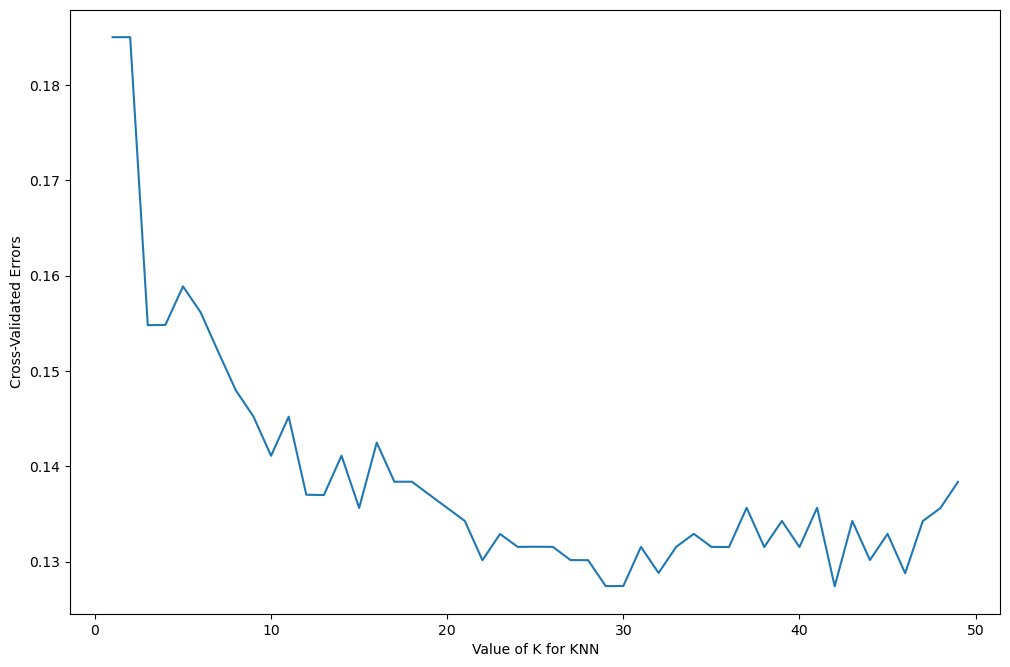

In [25]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=100)

plt.plot(k_range, k_error_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Errors')
plt.show()

the lowest error is obtained for K = 41. From K 20 to 50 the error does not decrease much, so choosing a high K value will only increase the complexity of the model.

from the elbow curve above a good K value would be betweem 10 to 20. For this model let's pick K = 15 

### Final Model with K = 

In [26]:
scaled_X_train_val

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up,HeartDisease
0,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,-0.540605,0.540605,0.838461,-0.838461,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,3.780432,-1.03325,-0.847921,0
1,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,-0.540605,0.540605,0.838461,-0.838461,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,0
2,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,-0.540605,0.540605,-1.192662,1.192662,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,0.96782,-0.847921,1
3,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,1.849780,-1.849780,0.838461,-0.838461,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,0
4,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,-0.540605,0.540605,0.838461,-0.838461,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,0.96782,-0.847921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,-0.603898,-0.708985,0.502261,-0.542709,-1.034232,-0.836286,1.849780,-1.849780,0.838461,-0.838461,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,-1.237350,2.050774,-0.264520,-1.03325,1.179356,0
730,-0.924483,-0.708985,0.234098,-0.542709,0.150977,-0.836286,-0.540605,0.540605,0.838461,-0.838461,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,0
731,0.678439,-0.166285,0.493014,-0.542709,0.309005,0.457358,-0.540605,0.540605,-1.192662,1.192662,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356,1
732,0.678439,1.027656,-1.846478,-0.542709,-0.718176,-0.836286,-0.540605,0.540605,-1.192662,1.192662,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,-1.237350,2.050774,-0.264520,-1.03325,1.179356,0


In [27]:
scaled_X_train_val_numpy = scaled_X_train_val.to_numpy()

In [28]:
classifier_final = k_nearest_neighbors(n_neighbors=15)

In [29]:
classifier_final.fit_knn(scaled_X_train_val_numpy, Y_train_val)
predict = classifier.predict_knn(scaled_X_test)
scores = accuracy_score(Y_test, predict)

In [30]:
print("Confusion Matrix: \n",confusion_matrix(Y_test, predict))    #[[68  9] [17 90]]
print("The F1 Score is: ",f1_score(Y_test, predict))               # F1 = 0.8737864077669902
print("The Accuracy Score is: ",accuracy_score(Y_test, predict))   # 0.8586956521739131
print("The Precision Score is: ",precision_score(Y_test, predict)) #0.9090909090909091
print("The Recall Score is: ",recall_score(Y_test, predict))       #0.8411214953271028

Confusion Matrix: 
 [[68  9]
 [17 90]]
The F1 Score is:  0.8737864077669902
The Accuracy Score is:  0.8586956521739131
The Precision Score is:  0.9090909090909091
The Recall Score is:  0.8411214953271028
